In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('data/food52_scraped_data.csv')

In [4]:
df.head()

,_id,rating,recipe,title,weblink
0,59d7cf29a980892888190548,14,2 tablespoons unsalted butter\n1/4 cup diced y...,Austin Diner-Style Queso,https://food52.com/recipes/73529-austin-diner-...
1,59d7cf30a98089288819054a,29,1 pound shelled raw peanuts\n1 tablespoon plus...,Mamba (Spicy Haitian Peanut Butter),https://food52.com/recipes/73211-mamba-spicy-h...
2,59d7cf39a98089288819054c,2,2 cups (8 1/2 ounces) all-purpose flour\n1/2 c...,Sheet Pan Muffins,https://food52.com/recipes/73548-sheet-pan-muf...
3,59d7cf3fa98089288819054e,92,"1 1/2 cups (300g) Puy lentils, washed\n4 clove...",Anna Jones' Favorite Lentils with Roasted Toma...,https://food52.com/recipes/73511-anna-jones-fa...
4,59d7cf48a980892888190550,3,2 ounces Seedlip Garden 108\n0.75 ounces Lemon...,Seedlip's A Good Dill,https://food52.com/recipes/73252-seedlip-s-a-g...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9721 entries, 0 to 9720
Data columns (total 5 columns):
_id        9721 non-null object
rating     9721 non-null int64
recipe     9233 non-null object
title      9721 non-null object
weblink    9721 non-null object
dtypes: int64(1), object(4)
memory usage: 379.8+ KB


In [6]:
import numpy as np
import string

In [7]:
def main_ingredient(col):
    ingredients = ['pork', 'chicken', 'beef']
    for item in ingredients:
        if item in str(col):
            return item
        else:
            continue

In [8]:
df['category'] = df['recipe'].apply(main_ingredient)

In [9]:
df['category'].value_counts()

chicken    2137
pork        696
beef        625
Name: category, dtype: int64

In [10]:
dummies = pd.get_dummies(df['category'])

In [11]:
dummies.head()

,beef,chicken,pork
0,0,0,0
1,0,0,0
2,0,0,0
3,1,0,0
4,0,0,0


In [12]:
df2 = pd.concat([df,dummies], axis=1)

In [13]:
df2.head()

,_id,rating,recipe,title,weblink,category,beef,chicken,pork
0,59d7cf29a980892888190548,14,2 tablespoons unsalted butter\n1/4 cup diced y...,Austin Diner-Style Queso,https://food52.com/recipes/73529-austin-diner-...,None,0,0,0
1,59d7cf30a98089288819054a,29,1 pound shelled raw peanuts\n1 tablespoon plus...,Mamba (Spicy Haitian Peanut Butter),https://food52.com/recipes/73211-mamba-spicy-h...,None,0,0,0
2,59d7cf39a98089288819054c,2,2 cups (8 1/2 ounces) all-purpose flour\n1/2 c...,Sheet Pan Muffins,https://food52.com/recipes/73548-sheet-pan-muf...,None,0,0,0
3,59d7cf3fa98089288819054e,92,"1 1/2 cups (300g) Puy lentils, washed\n4 clove...",Anna Jones' Favorite Lentils with Roasted Toma...,https://food52.com/recipes/73511-anna-jones-fa...,beef,1,0,0
4,59d7cf48a980892888190550,3,2 ounces Seedlip Garden 108\n0.75 ounces Lemon...,Seedlip's A Good Dill,https://food52.com/recipes/73252-seedlip-s-a-g...,None,0,0,0


In [14]:
del df2['_id']

In [15]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9721 entries, 0 to 9720
Data columns (total 8 columns):
rating      9721 non-null int64
recipe      9233 non-null object
title       9721 non-null object
weblink     9721 non-null object
category    3458 non-null object
beef        9721 non-null uint8
chicken     9721 non-null uint8
pork        9721 non-null uint8
dtypes: int64(1), object(4), uint8(3)
memory usage: 408.3+ KB


In [36]:
df2['category'].isnull().value_counts()

True     6263
False    3458
Name: category, dtype: int64

In [17]:
df2.iloc[9718]

rating                                                      8
recipe                                                    NaN
title               Savory Squash Soup with Parmesan Croutons
weblink     https://food52.com/recipes/14982-savory-squash...
category                                                 None
beef                                                        0
chicken                                                     0
pork                                                        0
Name: 9718, dtype: object

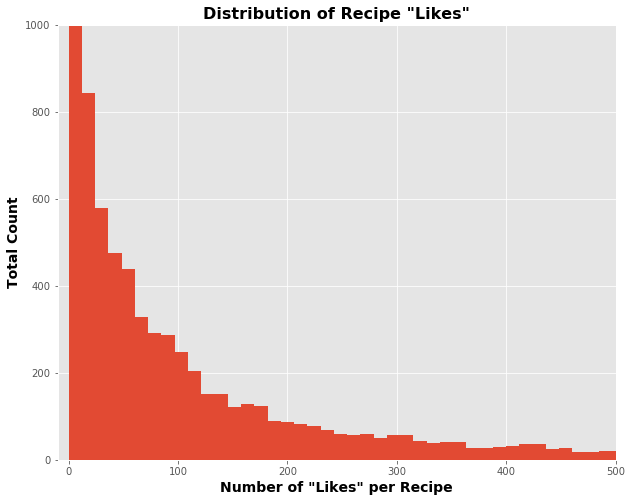

In [46]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
fig, ax = plt.subplots(figsize=(10,8))
ax.hist(df2['rating'], bins=1000)
ax.set_ylim([0, 1000])
ax.set_xlim([-10, 500])
ax.set_title('Distribution of Recipe "Likes"', fontsize=16, weight='bold', color='k')
ax.set_xlabel('Number of "Likes" per Recipe', fontsize=14, weight='bold', color='k')
ax.set_ylabel('Total Count', fontsize=14, weight='bold', color='k')
plt.savefig('data/distribution.png')

In [20]:
beef = df2['rating'].where(df2['category'] == 'beef')

In [22]:
beef.dropna(inplace=True)

In [59]:
beef_df = pd.DataFrame(beef)
beef_df.reset_index(inplace=True)

In [24]:
chicken = df2['rating'].where(df2['category'] == 'chicken')

In [25]:
chicken.dropna(inplace=True)

In [27]:
pork = df2['rating'].where(df2['category'] == 'pork')

In [28]:
pork.dropna(inplace=True)

In [37]:
other = df2['rating'].where(df2['category'].isnull())

In [38]:
other.dropna(inplace=True)

In [65]:
chicken_df = pd.DataFrame(chicken)
chicken_df.reset_index(inplace=True)
pork_df = pd.DataFrame(pork)
pork_df.reset_index(inplace=True)
other_df = pd.DataFrame(other)
other_df.reset_index(inplace=True)

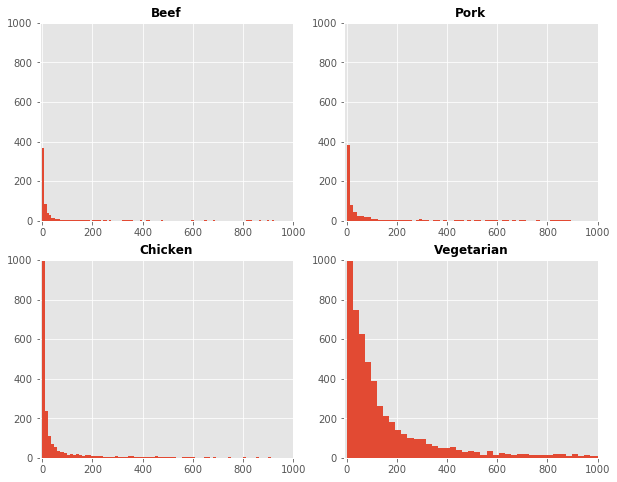

In [128]:
fig, axs = plt.subplots(2,2, figsize=(10,8))
recipes = [beef_df, chicken_df, pork_df, other_df]
titles = ['Beef', 'Chicken', 'Pork', 'Vegetarian']
for idx, ax in enumerate(axs):
    ax[0].hist(recipes[idx]['rating'], bins=500)
    ax[1].hist(recipes[idx + 2]['rating'], bins=500)
    ax[0].set_ylim([0, 1000])
    ax[1].set_ylim([0, 1000])
    ax[0].set_xlim([-10, 1000])
    ax[1].set_xlim([-10, 1000])
    ax[0].set_title(titles[idx], fontsize=12, weight='bold', color='k')
    ax[1].set_title(titles[idx+2], fontsize=12, weight='bold', color='k')
#     ax[idx].set_xlabel('Number of "Likes" per Recipe', fontsize=14, weight='bold', color='k')
#     ax[idx].set_ylabel('Total Count', fontsize=14, weight='bold', color='k')
#     plt.tight_layout()
    plt.savefig('data/distribution_ingredients.png')

(array([ 645.,   21.,    9.,    8.,    5.,    1.,    2.,    1.,    1.,
           0.,    0.,    0.,    1.,    1.,    0.,    0.,    0.,    0.,
           0.,    1.]),
 array([    0.  ,   343.55,   687.1 ,  1030.65,  1374.2 ,  1717.75,
         2061.3 ,  2404.85,  2748.4 ,  3091.95,  3435.5 ,  3779.05,
         4122.6 ,  4466.15,  4809.7 ,  5153.25,  5496.8 ,  5840.35,
         6183.9 ,  6527.45,  6871.  ]),
 <a list of 20 Patch objects>)

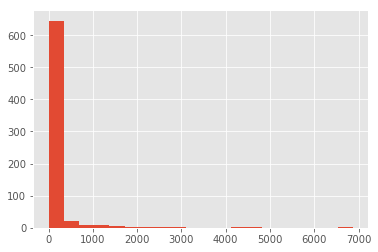

In [86]:
fig, ax = plt.subplots()
ax.hist(pork_df['rating'], bins=20)